In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import requests
from io import StringIO
import yfinance as yf
import random
import math

In [ ]:
# 0. Preliminaries

In [ ]:
# 0.0 Native Python Data Types 

# Note: this is not an exhaustive or complete collection of natrive data types, just the most relevant ones for what we are planning to do below. 

In [4]:
# 0.0.1 Lists
 
# Lists are specified by square-bracket arrays: [a, b, c, ...]. The elements of the list can be any elementary data types (so we have lists of lists), and are ORDERED (so that these are elements of a cartesian product). Lists can store multiple different types of data.

# 0.0.1.1 E.g.

numList = [1,7,5,-3,90]
print("numList = ",numList,"\n","numList[0] = ",numList[0])

# 0.0.1.2 E.g.

charList = ["a","hello!","text"," ""next"" "]
print("charList = ",charList,"\n","charList[3] = ",charList[3])

# 0.0.1.3 E.g.

testList = [0,"hi"]
for i in range(len(testList)):
    print(type(testList[i]),testList[i])

# The indexing starts at j = 0 (as seen above in the example 0.1.1). Indexing is cyclic, and concatenation operator is '+'

# 0.0.1.4 E.g.

charList[-1] == charList[3] # cyclic indexing implies this is TRUE

fullList1 = charList + numList
fullList2 = numList + charList

fullList1 == fullList2 # there are logical operators; because we preserve order, this is FALSE

print(fullList1 + [])

# Lists can be transformed; just reassign the appropriate component(s). You can even assign to new lists old lists by listA = listB[:], or just parts by listA = listB[n:m] getting components n through m-1. The key difference is this: list[n] returns the OBJECT at the (n-1) component, whereas list[n:n+1] returns the (one-element) LIST consisting of the OBJECT at the component n-1. You can even assign new lists at given slice of a given list

# 0.0.1.5 E.g.

for i in range(len(charList)):
    numList[i] = charList[i]
    print(numList)

newNumList = numList[:]
print(newNumList)

print(numList[1],numList[1:2]) # as an example

fullList1[2:5] = fullList2 # replaces the sublist from 2 to 4 (inclusive) with fullList2 (using python indexing--normal indexing would be "from 3 to 5")

# besides concatenation, you can also append (using list_name.append()). Note that this adds the second list AS AN ELEMENT. Furthermore, it stores the new list to the old list. 

# 0.0.1.6 E.g.

print(fullList1.append(fullList2))

numList =  [1, 7, 5, -3, 90] 
 numList[0] =  1
charList =  ['a', 'hello!', 'text', ' next '] 
 charList[3] =   next 
<class 'int'> 0
<class 'str'> hi
['a', 'hello!', 'text', ' next ', 1, 7, 5, -3, 90]
['a', 7, 5, -3, 90]
['a', 'hello!', 5, -3, 90]
['a', 'hello!', 'text', -3, 90]
['a', 'hello!', 'text', ' next ', 90]
['a', 'hello!', 'text', ' next ', 90]
hello! ['hello!']
None


In [5]:
# 0.0.2 Functions
# 
# Functions are objects that encode rules that are assignments of the form f: n -> m(n). Arguments and outputs need not be integers. Python supports a naive (typed) lambda calculus (following the fact that the language itself is typed). Functions are DEFINED.

# 0.0.2.1 E.g. The following function takes a list as an argument and returns a squence of sublists in increasing order from just the initial element to all elements 'descendent' from it. 

def stick(lst):
    t = []
    for i in range(len(lst)+1):
        if i == 0:
            t.append(lst[i])
        else:
            t.append(lst[0:i])
    return t

# one could think of this as a function which gets a 'branch' of some tree with root nodes given in the argument. You can define functions of multiple arguments, and even allow some of them to have default values. 

# 0.0.2.2 E.g. The following function takes in a list of lists, then for each list builds a stick using the previous function, then takes the coproduct of these and prints the new object, which is a list. 

def tree(lst=[],t=[]):
    for i in range(len(lst)):
        if type(stick(lst[i]))==type([]):
            t = t + stick(lst[i])
        else:
            t = t + [stick(lst[i])]
    return t

print(stick(numList))
print("-------//-------")
print(tree(stick(numList),[]))


['a', ['a'], ['a', 'hello!'], ['a', 'hello!', 'text'], ['a', 'hello!', 'text', ' next '], ['a', 'hello!', 'text', ' next ', 90]]
-------//-------
['a', 'a', 'a', ['a'], 'a', ['a'], ['a', 'hello!'], 'a', ['a'], ['a', 'hello!'], ['a', 'hello!', 'text'], 'a', ['a'], ['a', 'hello!'], ['a', 'hello!', 'text'], ['a', 'hello!', 'text', ' next '], 'a', ['a'], ['a', 'hello!'], ['a', 'hello!', 'text'], ['a', 'hello!', 'text', ' next '], ['a', 'hello!', 'text', ' next ', 90]]


In [6]:
# 0.0.3 Sets and Tuples
#
# Sets and tuples are derived from lists but satisfy other properties which one might expect.
# 
# Tuples are immutable lists (lengths and values can't change) and are denoted as x = (x[1], x[2], ..., x[n]) (although one need not specify the parenthases when defining x). The components can be any data type, mutable or otherwise. 

# 0.0.3.1 E.g. Tuples

x = (1,2,"hi")
print(x[1])

# Sets are technically unordered, and consist of collection of elements and offer the predicate x in A, where x a possible element and A a set. This is synonymous with the characteristic function (but returns a boolean rather than an integer). One can use the principle of comprehension to build sets (also lists!). These work for strings too, and extract the unique letters in a string. There are the usual set operations: (relative) complement, and, or, symmetric difference, etc etc. Python is smart enough to convert ints to floats, floats to ints to compute these. Empty set is denoted set().

# 0.0.3.2 E.g. Sets

S = {1,2,3,4,5}

T = {x/10.00 for x in range(0,100) if x < 100}
Tarray = [x/10.00 for x in range(0,100) if x < 100]

T - S # complement
T | S # join
S & T # meet
S ^ T # symmetric difference

2


{0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.0,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.9,
 9.0,
 9.1,
 9.2,
 9.3,
 9.4,
 9.5,
 9.6,
 9.7,
 9.8,
 9.9}

In [7]:
# 0.0.4 Dictionaries

# Dictionaries are important data structures. They abstract out lists (and other numeric-indexed objects) and index the data by things called KEYS rather than numbers. Keys can be any IMMUTABLE type (numerics, booleans, strings, bytes, tuples--possibly derived immutable types, see the discussion on classes). Strings and numbers can always be used as keys, but tuples can only be used if its components are immutable. Fundamentally, a dictionary is a set (list) of key-value pairs denoted {key1: val1, key2: val2,...}. In this sense, the key denotes a sort of type, and the associated value is a specific instance. Keys are UNIQUE within a given dictionary. The empty dictionary is denoted {}. We extract a specific value using the associated key. We can delete the data associated to a specific key by doing del dict[key]. We can pull the list of of keys by using list(dict) or sorted(dict). We can check if a key belongs to a dictionary by key in dict. 

# 0.0.4.1 E.g.

dct = {
    "str": "hello",
    "lst": numList,
    "fn": stick,
    "set": S
    }

# We can evaluate a function in dictionary at a key using the syntax dct[key](arg). Python is even smart enough to Curry. For example, if we replace dct["fn"] = [stick, tree], then we can call dct["fn"][0](list(S)), which evaluates to stick([1,2,3,4,5]).

In [8]:
# 0.0.5 Some other small things that will be useful to know

# 0.0.5.1 Modules

# Modules are files that store definitions in a static setting that allow importing of the objects into the (potentially dynamic) environment one works in. For example, we could create a module called forest.py with the functions stick and tree, import this as import forest, then call the relevant functions directly. To call these, one would need to call them as forest.stick or forest.tree. 

# 0.0.5.2 Classes

# Classes give ways to define new TYPES of data. We don't need these at this time so we postpone their indepth discussion to the point where we may need to call upon them. 
 
# ------------------------//------------------------

In [9]:
# 0.1 Fundamental algorithmic structures

In [10]:
# 0.1.1 If Statements

# If statements are used to (logically) check among various cases in an iterative way. If statements evaluate the first line that is true

# 0.1.1.1 E.g. 

if True:
    print("True")

# Notice that it evaluates what is within the argument of the statement, denoted by ":". Now if we add anything after it, it will not evaluate. One adds additional lines by first elif, which details all alternative options except the first and last, and the last is denoted else.

# 0.1.1.2 E.g.

if not(True):
    print("You'll never see the light of day!")
elif True:
    print("True")
else:
    print("Never!")

# Note especially that else takes no argument after it. It entails all outcomes which are not listed in the finite number first considered. If one tries to include additional data here, there will be an error. If statements always evaluate what appears after each header in a logical way. This can be done by comparing not just directly, but also by ordering.

# 0.1.1.3 E.g.

x = 10

if x < 10:
    print("Here!")
elif x > 10:
    print("No, here!")
else:
    print("No, no! Here!")

# These can also be used to check equality of strings

# 0.1.1.4 E.g.

y = "tes"

if y == "test":
    print("This is a test.")
else:
    print("Did you pass?")

# This generalizes to the other data types. 

# 0.1.1.5 E.g.

dct1 = dct

if dct1 == dct:
    print("See?! dct1 = ", dct1)

True
True
No, no! Here!
Did you pass?
See?! dct1 =  {'str': 'hello', 'lst': ['a', 'hello!', 'text', ' next ', 90], 'fn': <function stick at 0x0000017F267EFA60>, 'set': {1, 2, 3, 4, 5}}


In [21]:
# 0.1.2 For loops

# For loops are one of the fundamental ways to iterate. In python, we iterate over a given sequence, and evalute the function at the argument of the value in the sequence. This is distinct from, e.g., MATLAB, where the iteration proceeds over a direct numerical index.

# 0.1.2.1 E.g.

lstForLoop1 = [1,2,3,4,5]
k = 0

for i in lstForLoop1:
    print(i,lstForLoop1[k])
    k = k+1

print("-------//-------")

# But we can also use lists that store other types, so we can loop over their elements

# 0.1.2.2 E.g.

lstForLoop2 = lstForLoop1 + ["cat","dog","grandma"]
k = 0

for i in lstForLoop2:
    print(i,lstForLoop2[k])
    print(2*lstForLoop2[k])
    k = k+1

print("-------//-------")

# We can also loop over dictionaries

# 0.1.2.3 E.g.

print(dct)

for key in dct:
    print(type(key),key,type(dct[key]),dct[key])

# Importantly, note that it is the keys which are looped over, which are themselves strings. 

print("-------//-------")

# As we mentioned above, one can also use the range() function

# 0.1.2.4 E.g.

for j in range(10):
    print(j)

# range(n) yields a sequence of 10 integers starting at 0 (in the classic python fashion). Range admits a lower bound as well as an upper bound. It also allows specification of step size. 

print("-------//-------")

# Interestingly, one can use break, continue, and even else statements in loops. Else statements need to be paired with breaks--if the break isn't executed, the else clause will be 

# 0.1.2.5a E.g.

for i in range(2,12,2):
    print(i)
    continue
    print(i+1)

print("--/--")

# 0.1.2.5b E.g.

for i in range(2,12,2):
    print(i)
    break
    print(i+1)

print("--/--")

# 0.1.2.5c E.g.

for i in range(2,12,2):
    if not(True):
        break
else: 
    print("Hiya!")

1 1
2 2
3 3
4 4
5 5
-------//-------
1 1
2
2 2
4
3 3
6
4 4
8
5 5
10
cat cat
catcat
dog dog
dogdog
grandma grandma
grandmagrandma
-------//-------
{'str': 'hello', 'lst': ['a', 'hello!', 'text', ' next ', 90], 'fn': <function stick at 0x0000017F267EFA60>, 'set': {1, 2, 3, 4, 5}}
<class 'str'> str <class 'str'> hello
<class 'str'> lst <class 'list'> ['a', 'hello!', 'text', ' next ', 90]
<class 'str'> fn <class 'function'> <function stick at 0x0000017F267EFA60>
<class 'str'> set <class 'set'> {1, 2, 3, 4, 5}
-------//-------
0
1
2
3
4
5
6
7
8
9
-------//-------
2
4
6
8
10
--/--
2
--/--
Hiya!


In [ ]:
# 0.2 Other stuff

# At this time, we don't need much else to get started. This section will be expanded if I find the need to pull in other stuff. In principle, data types and algorithmic structures are enough to get started. 

In [ ]:
# 1. Pandas

In [ ]:
# 1.1 Dataframes

# 1.1.1 What are dataframes? How are they built?

# Dataframes are like matrices, with rows and columns. On the other hand, like with sets, they can be built by construction, or by invoking a function which outputs the df as the image of the function called. The pandas function DataFrame takes in a dictionary and outputs the new data structure 'dataframe'. Therefore one can think of it as a map of types (i.e., a type of A -> B). The keys of the dict become the heads of the columns. A single column is called a 'series'. If no index is specified, the index is numeric and by default is the same indexing convention as lists. The dataframe function admits an argument for other methods of indexing. Indices can also be other objects. The column heads (column names) index the data structure as with dictionaries (since they are derived from there).

# 1.1.1.1 E.g.

dataDct = {
    "col1": list(range(10)), "col2":list(range(10,20))
}

df = pd.DataFrame(dataDct, index=stick("abcdefghij")[1:11]) # index the df by strings

print(df)
df["col1"]

print("-------//-------")

            col1  col2
a              0    10
ab             1    11
abc            2    12
abcd           3    13
abcde          4    14
abcdef         5    15
abcdefg        6    16
abcdefgh       7    17
abcdefghi      8    18
abcdefghij     9    19
-------//-------


In [103]:
# 1.1.2 Using dataframes to analyse Wiener Processes

def twoPointDist(n):
    x = random.random()
    if x <= 0.5:
        return -1/np.sqrt(n)
    else:
        return 1/np.sqrt(n)
    
def binarySamplePath(n):
    xData172 = np.linspace(0,1,n)
    yData172 = []
    xStep = 0

    for x in xData172:
        dx = twoPointDist(100)
        xStep = xStep + dx
        yData172.append(xStep)

    return xData172, yData172

# Now build a dictionary with the keys labeling the sample path and the value storing the sample path in question. 

brownDct = {}
tIndex = np.linspace(0,1,100)

for n in range(1000):
    wienerPath = binarySamplePath(100)[1]
    brownDct[n+1] = wienerPath

wienerDf = pd.DataFrame(brownDct,tIndex)

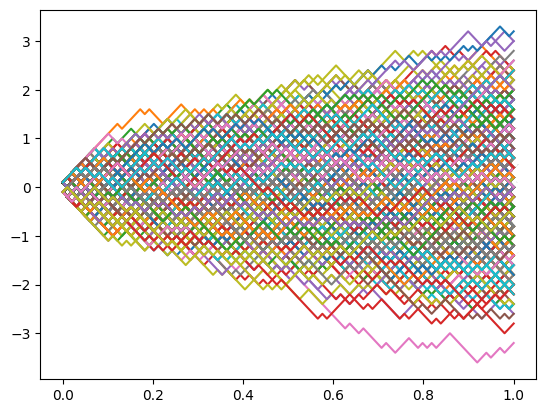

In [104]:
# test = list(range(5,22)) + list(range(71,84))
# wienerDf[test].plot(legend=False)
# plt.show()

wienerDf.plot(legend=False)
plt.show()

<Axes: >

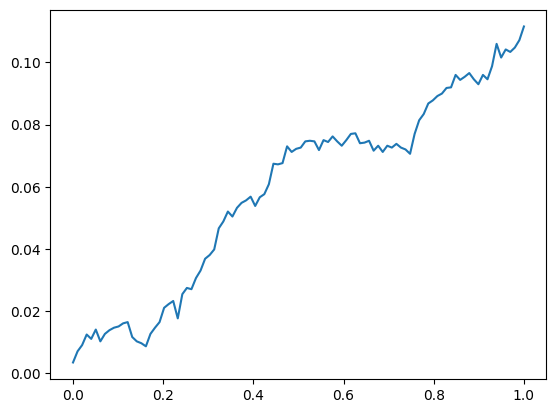

In [105]:
dfNew = wienerDf.mean(axis=1)
dfNew.plot(legend=False)


In [1]:
# checking if the product of Gaussian RVs is a Gaussian RV

yData1 = []
yData2 = []
yDataProd = []
yDataSum = []

xData = np.linspace(-1,1,1000)

for x in xData:
    yD1 = np.random.normal(0,10)
    yD2 = np.random.normal(0,1)
    yDprod = yD1*yD2
    yDsum = yD1 + yD2
    yData1.append(yD1)
    yData2.append(yD2)
    yDataProd.append(yDprod)
    yDataSum.append(yDsum)

# plt.plot(xData,yData1)
# plt.show()

# plt.plot(xData,yData2)
# plt.show()

plt.hist(yData1,100)
plt.show()

plt.hist(yData2,100)
plt.show()

plt.hist(yDataProd,100)
plt.show()

plt.hist(yDataSum,100)
plt.show()

NameError: name 'np' is not defined

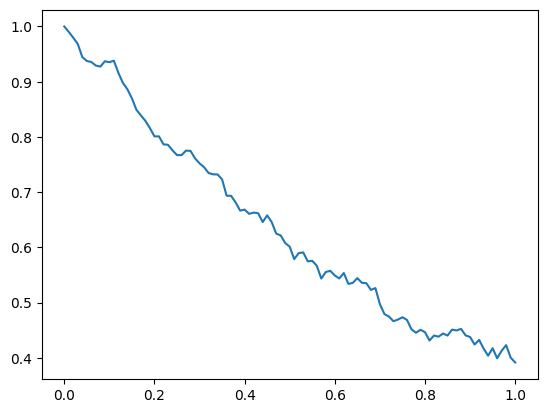

In [ ]:
# We'll now build some test cases where we solve a specific stochastic diff eqn numerically (by direct integration). This uses Euler's method to solve the diff eqn

def wienerIncrement(s):
    return np.random.normal(0,s)

def xStep(s,f,g,dt):
    return f*dt + g*wienerIncrement(s)

t1 = 1
n = 10**2
dt = t1/n

tArray = np.linspace(dt,t1,n)
xArray = [1]
xNow = xArray[0]

gamma = 1
g = 1

for t in tArray:
    f = -gamma*xNow
    # print(f)
    dx = xStep(dt,f,g,dt)
    xNow = xNow + dx
    xArray.append(xNow)
    continue

tArray = np.concatenate((np.array([0]),tArray))

plt.plot(tArray,xArray)
plt.show()

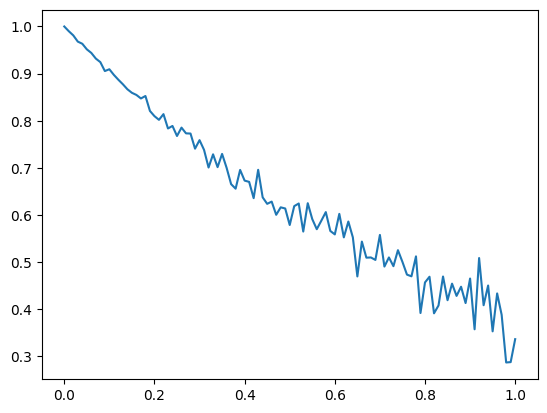

In [ ]:
# Numerical representation of the exact solution

t1 = 1
n = 10**2
dt = t1/n

tArray = np.linspace(dt,t1,n)
xArray1 = [1]
x0 = xArray1[0]
wienerPosition = 0

gamma = 1
g = 1

def wienerIntegral(t,n,dt,gamma):
    tArrayHold = np.linspace(0,t,n)
    sum = 0
    for tp in tArrayHold:
        sum = sum + dt*np.exp(gamma*(tp-t))*wienerIncrement(tp)
    return sum

for t in tArray:
    x = x0*np.exp(-gamma*t) + g*wienerIntegral(t,n,dt,gamma) 
    xArray1.append(x)

tArray = np.concatenate((np.array([0]),tArray))

plt.plot(tArray,xArray1)
plt.show()



In [74]:
# Let's assume now that we have many samples. We'll throw these into a dataframe, and analyze. 

def wienerIntegral(t,n,dt,gamma):
    tArrayHold = np.linspace(0,t,n)
    sum = 0
    for tp in tArrayHold:
        sum = sum + dt*np.exp(gamma*(tp-t))*wienerIncrement(tp)
    return sum

def wienerIntFn():
    t1 = 1
    n = 3*10**2
    dt = t1/n

    tArray = np.linspace(dt,t1,n)
    xArray1 = [1]
    x0 = xArray1[0]

    gamma = 1
    g = 1

    for t in tArray:
        x = x0*np.exp(-gamma*t) + g*wienerIntegral(t,n,dt,gamma) 
        xArray1.append(x)

    tArray = np.concatenate((np.array([0]),tArray))
    
    return tArray, xArray1


def wienerIncrement(s):
    return np.random.normal(0,s)

def xStep(s,f,g,dt):
    return f*dt + g*wienerIncrement(s)

def wienerDerivFn():

    t1 = 1
    n = 3*10**2
    dt = t1/n

    tArray = np.linspace(dt,t1,n)
    xArray = [1]
    xNow = xArray[0]

    gamma = 1
    g = 1

    for t in tArray:
        f = -gamma*xNow
        dx = xStep(dt,f,g,dt)
        xNow = xNow + dx
        xArray.append(xNow)
        continue

    tArray = np.concatenate((np.array([0]),tArray))

    return tArray, xArray

wienerIntDct = {}
wienerDerivDct = {}

for j in range(100):
    wienerIntProc = wienerIntFn()
    wienerDerivProc = wienerDerivFn()
    wienerIntDct[j+1] = wienerIntProc[1]
    wienerDerivDct[j+1] = wienerDerivProc[1]

tIntArray = wienerIntProc[0]
tDerivArray = wienerDerivProc[0]

wienerIntDf = pd.DataFrame(wienerIntDct,index=tIntArray)
wienerDerivDf = pd.DataFrame(wienerDerivDct,index=tDerivArray)

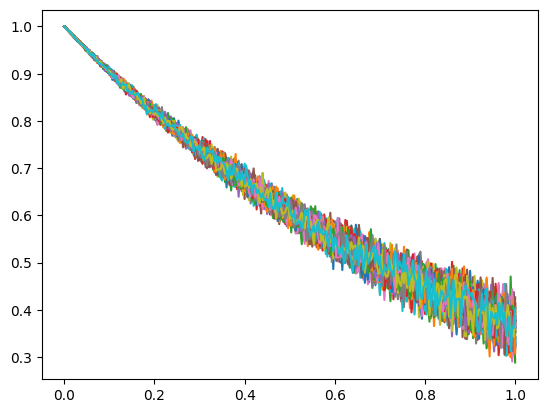

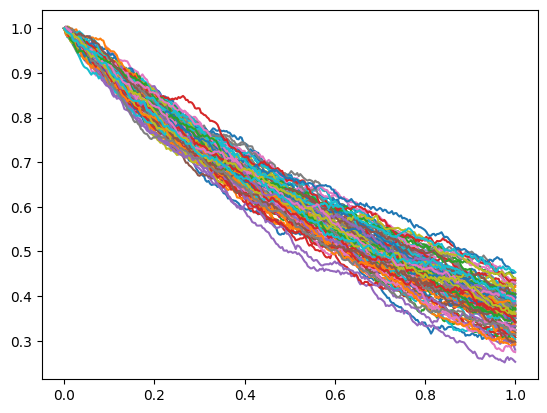

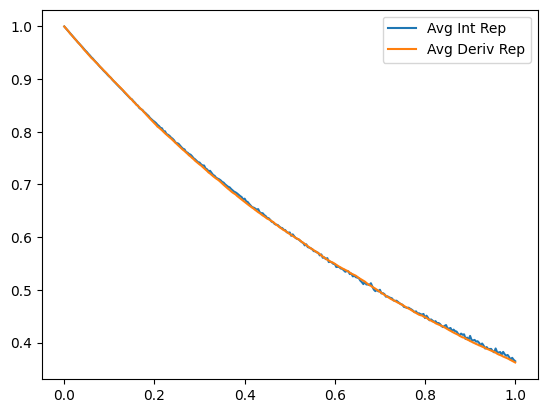

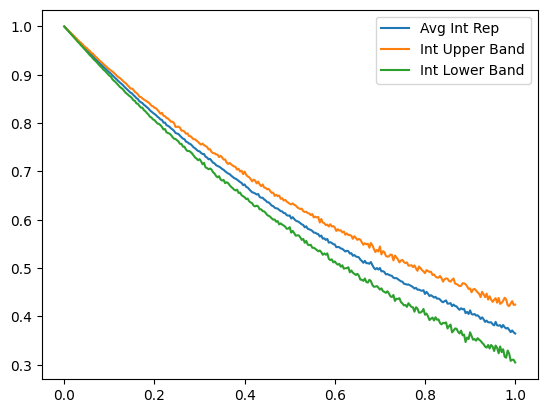

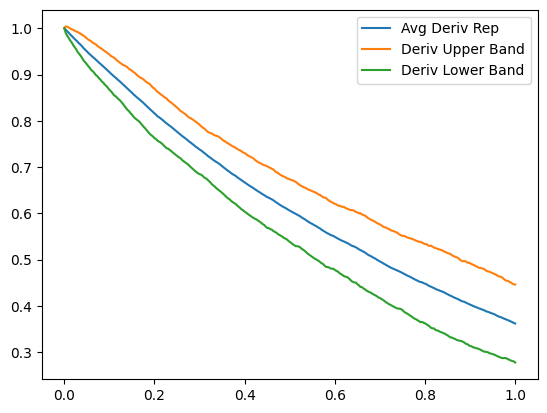

In [101]:
for j in range(1,101):
    wienerIntDf[j].plot()

plt.show()

for j in range(1,101):
    wienerDerivDf[j].plot()

plt.show()

wienerIntAvg = wienerIntDf.mean(axis=1)
wienerDerivAvg = wienerDerivDf.mean(axis=1)

wienerIntVar = wienerIntDf.std(axis=1)
wienerDerivVar = wienerDerivDf.std(axis=1)

wienerAvg = pd.concat([wienerIntAvg,wienerDerivAvg], axis=1)
wienerVar = pd.concat([wienerIntVar,wienerDerivVar], axis=1)

wienerAvg = wienerAvg.rename(columns={0 : "Avg Int Rep", 1 : "Avg Deriv Rep"})
wienerVar = wienerVar.rename(columns={0 : "Var Int Rep", 1 : "Var Deriv Rep"})

wienerAvg.plot()
plt.show()

# print(wienerVar)

wienerStats = wienerAvg.join(wienerVar)
wienerStats["Int Upper Band"] = wienerStats["Avg Int Rep"] + 2*wienerStats["Var Int Rep"]
wienerStats["Int Lower Band"] = wienerStats["Avg Int Rep"] - 2*wienerStats["Var Int Rep"]
wienerStats["Deriv Upper Band"] = wienerStats["Avg Deriv Rep"] + 2*wienerStats["Var Deriv Rep"]
wienerStats["Deriv Lower Band"] = wienerStats["Avg Deriv Rep"] - 2*wienerStats["Var Deriv Rep"]

wienerStats[["Avg Int Rep","Int Upper Band","Int Lower Band"]].plot()
plt.show()

wienerStats[["Avg Deriv Rep","Deriv Upper Band","Deriv Lower Band"]].plot()
plt.show()

# print(wienerStats)

# wienerIntAvg.plot(use_index=True)
# wienerDerivAvg.plot()
# plt.show()